### Try this notebook in Google Colab, Binder or SageMaker!

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/InsightSoftwareConsortium/itkwidgets/HEAD?labpath=examples%2Fintegrations%2Fitk%2FPointSet.ipynb)
[![Open In SageMaker Studio Lab](https://studiolab.sagemaker.aws/studiolab.svg)](https://studiolab.sagemaker.aws/import/github.com/InsightSoftwareConsortium/itkwidgets/blob/main/examples/integrations/itk/PointSet.ipynb)

In [1]:
import sys, os

!{sys.executable} -m pip install -q tqdm pooch "itk>=5.3.0" "itkwidgets[all]>=1.0a23"

In [2]:
import itk
import pooch
import numpy as np
from itkwidgets import view

In [6]:
# Download data
files = pooch.retrieve(
    url='https://bafybeidii6e4zhuswkhw7tm3dalmfw5yt4mja5yf3gb7t4jur3rdgdecve.ipfs.w3s.link/ipfs/bafybeidii6e4zhuswkhw7tm3dalmfw5yt4mja5yf3gb7t4jur3rdgdecve/DeformAVolumeWithAThinPlateSpline.zip',
    known_hash='sha256:d267f9216d11c3f953b3a2601f38d1434ab97c17834dca0ad1b3ff558226c9c1',
    processor=pooch.Unzip(), path="./", fname="ThinPlateSpline", progressbar=True)
file_path = os.path.commonpath(files)

In [7]:
source_landmarks = os.path.join(file_path, "SourceLandmarks.vtk")
target_landmarks = os.path.join(file_path, "TargetLandmarks.vtk")
input_image = os.path.join(file_path, "brainweb165a10f17.mha")
deformed_image = os.path.join(file_path, "DeformedImage.png")
checker_board_image = os.path.join(file_path, "CheckerBoard.png")

In [8]:
Dimension = 3
thin_plate_spline = itk.ThinPlateSplineKernelTransform[itk.D, Dimension].New()

In [9]:
source_landmarks_mesh = itk.meshread(source_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(source_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
source_landmarks = thin_plate_spline.GetSourceLandmarks()
source_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))


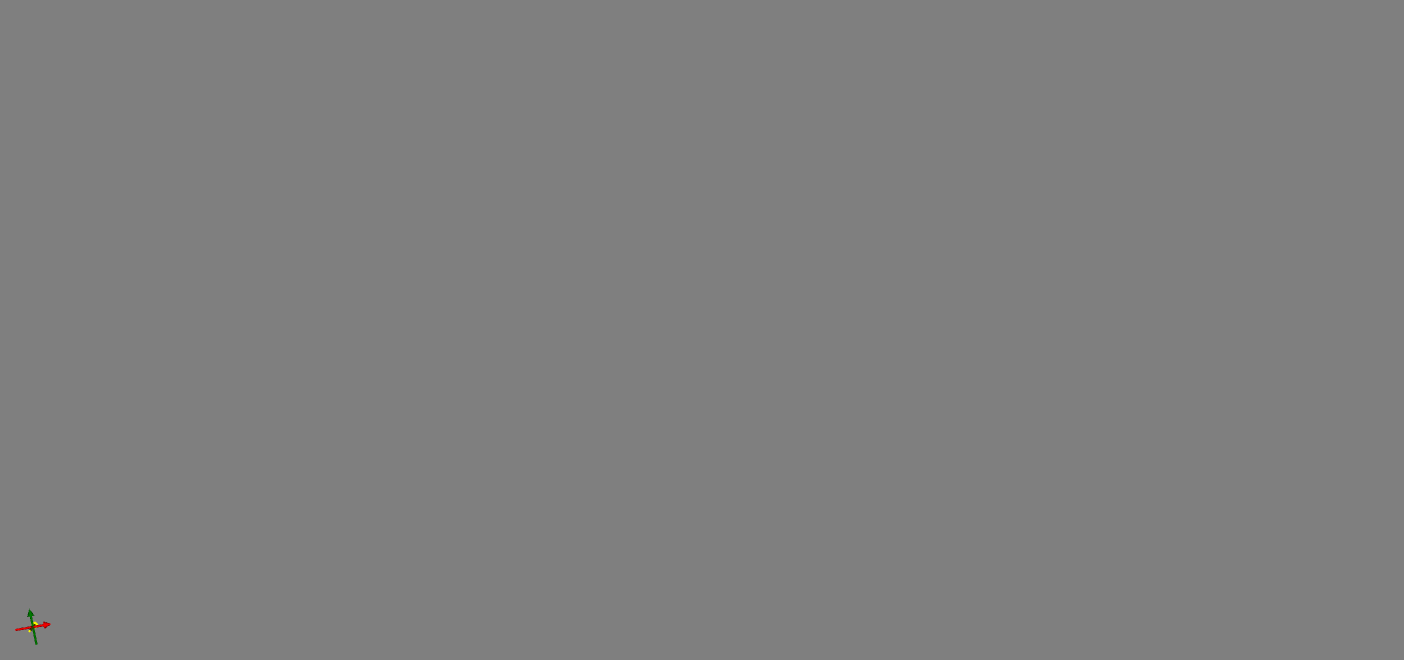
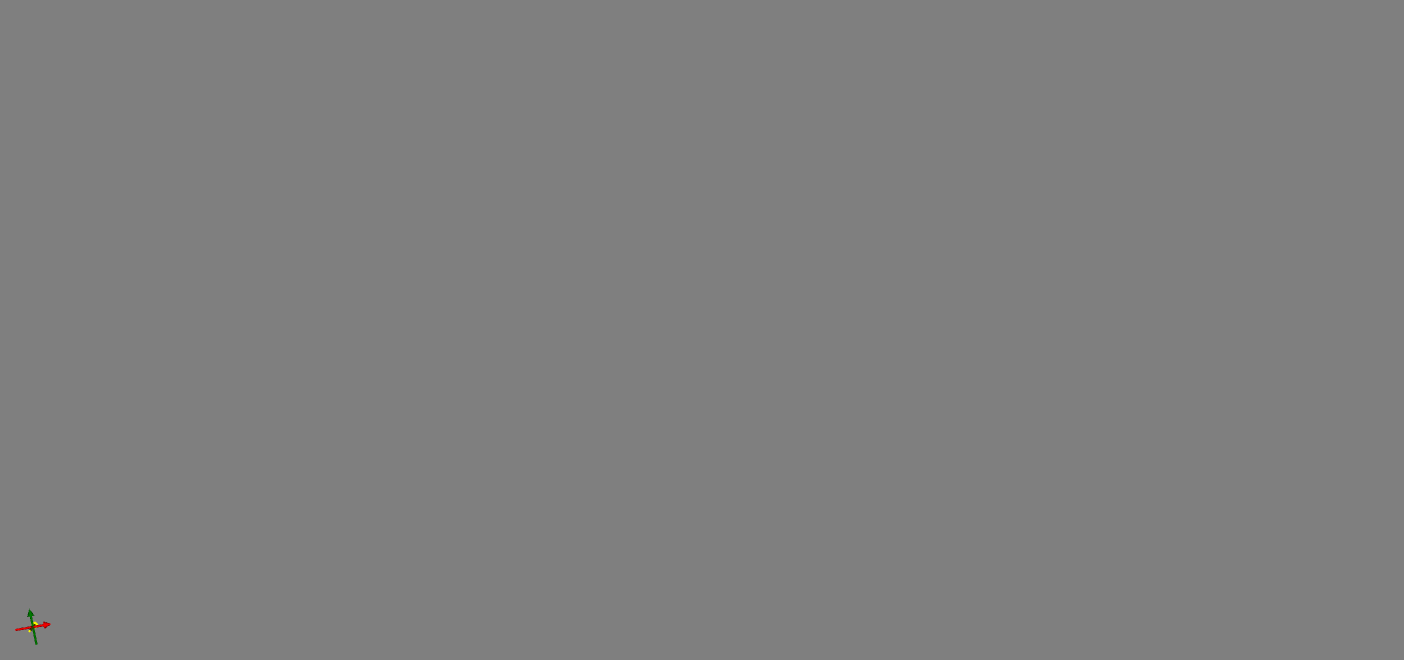

<IPython.core.display.Javascript object>

In [12]:
view(point_set=source_landmarks)

In [13]:
target_landmarks_mesh = itk.meshread(target_landmarks)
# Cast points from float32 to float64
points = itk.array_from_vector_container(target_landmarks_mesh.GetPoints())
points = points.astype(np.float64)
target_landmarks = thin_plate_spline.GetTargetLandmarks()
target_landmarks.SetPoints(itk.vector_container_from_array(points.flatten()))


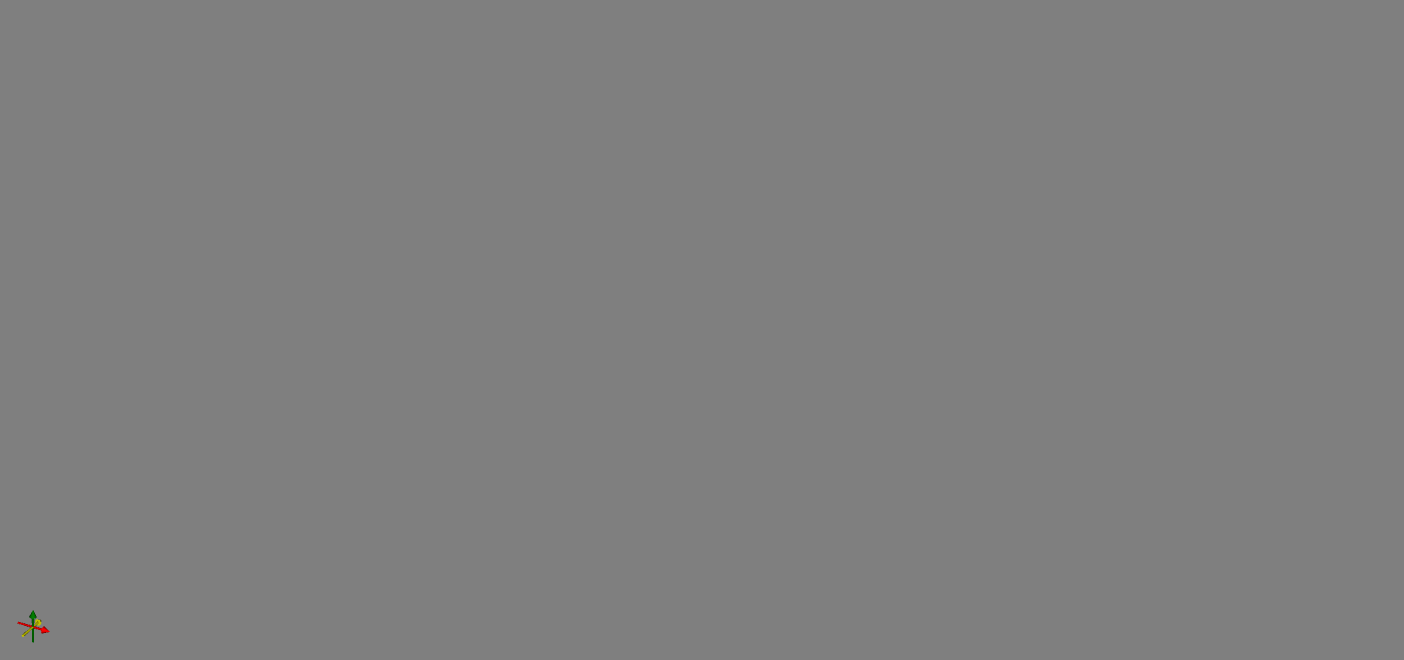
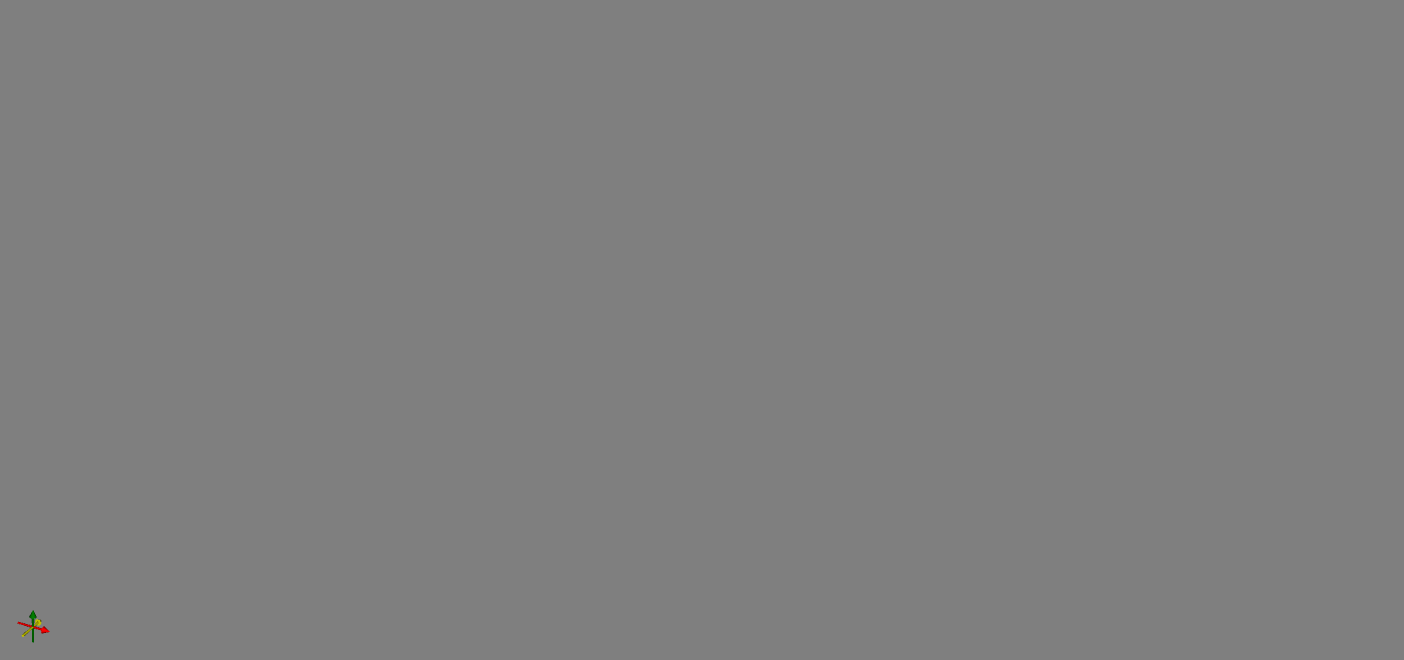

<IPython.core.display.Javascript object>

In [15]:
view(point_set=target_landmarks)

In [16]:
thin_plate_spline.ComputeWMatrix()

input_image = itk.imread(input_image)


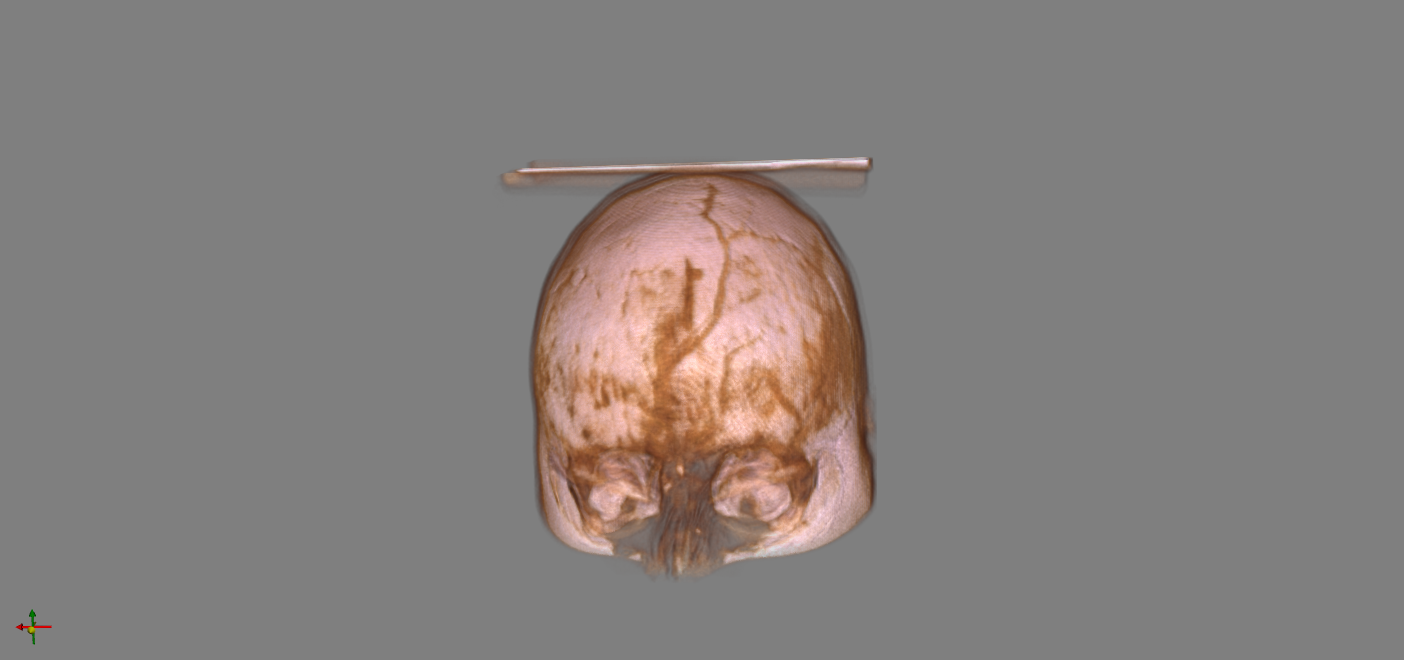
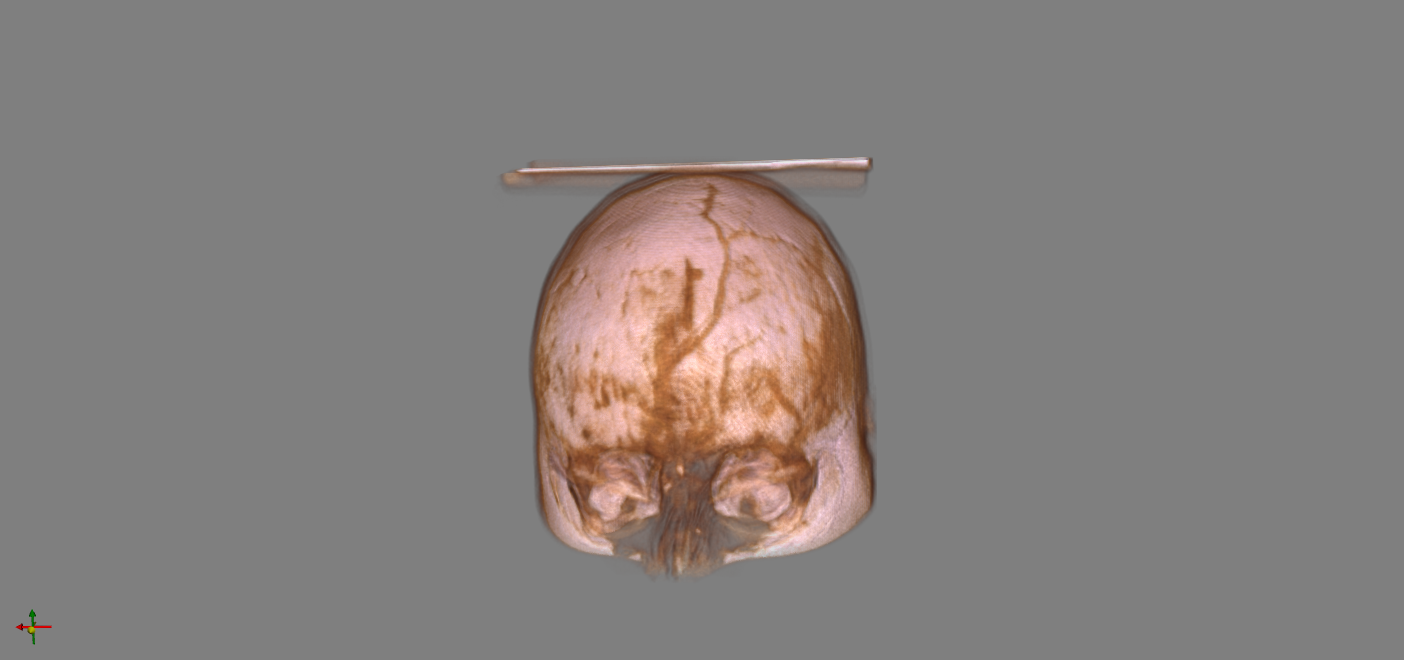

<IPython.core.display.Javascript object>

In [17]:
view(input_image)

In [18]:
deformed = itk.resample_image_filter(
    input_image,
    use_reference_image=True,
    reference_image=input_image,
    transform=thin_plate_spline,
)

In [19]:
itk.imwrite(deformed, deformed_image)


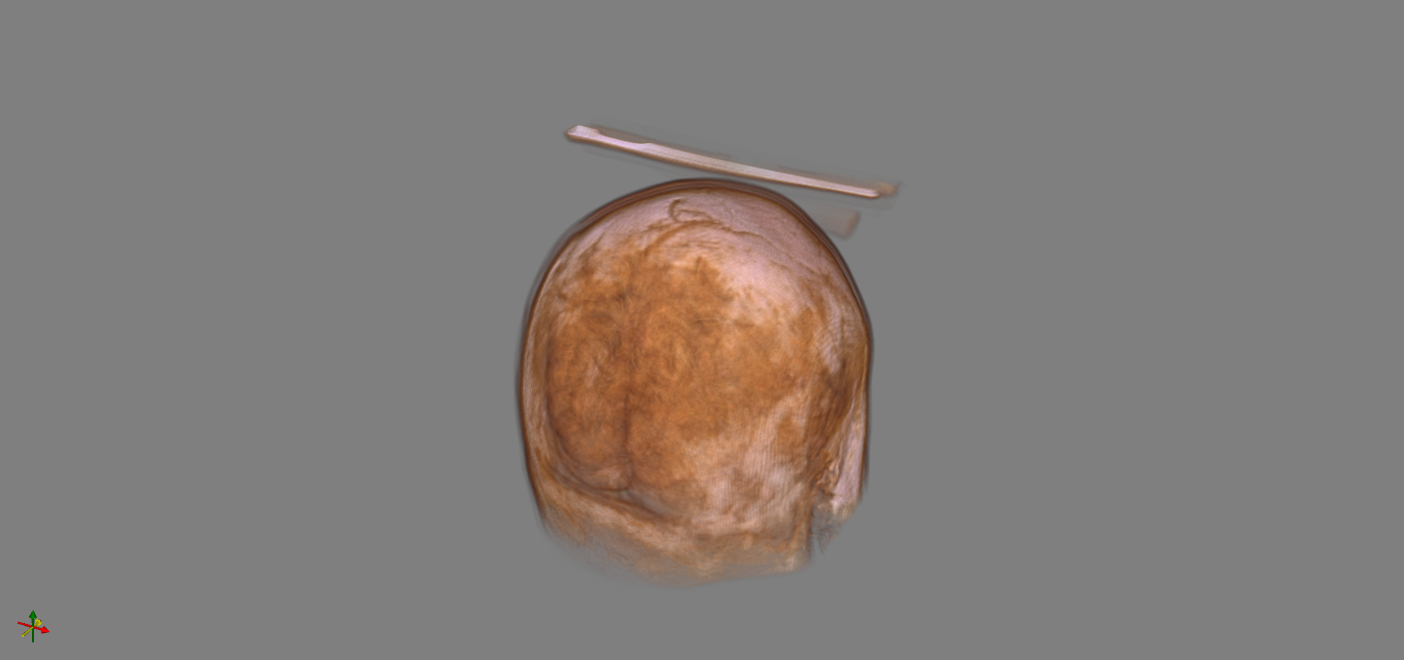
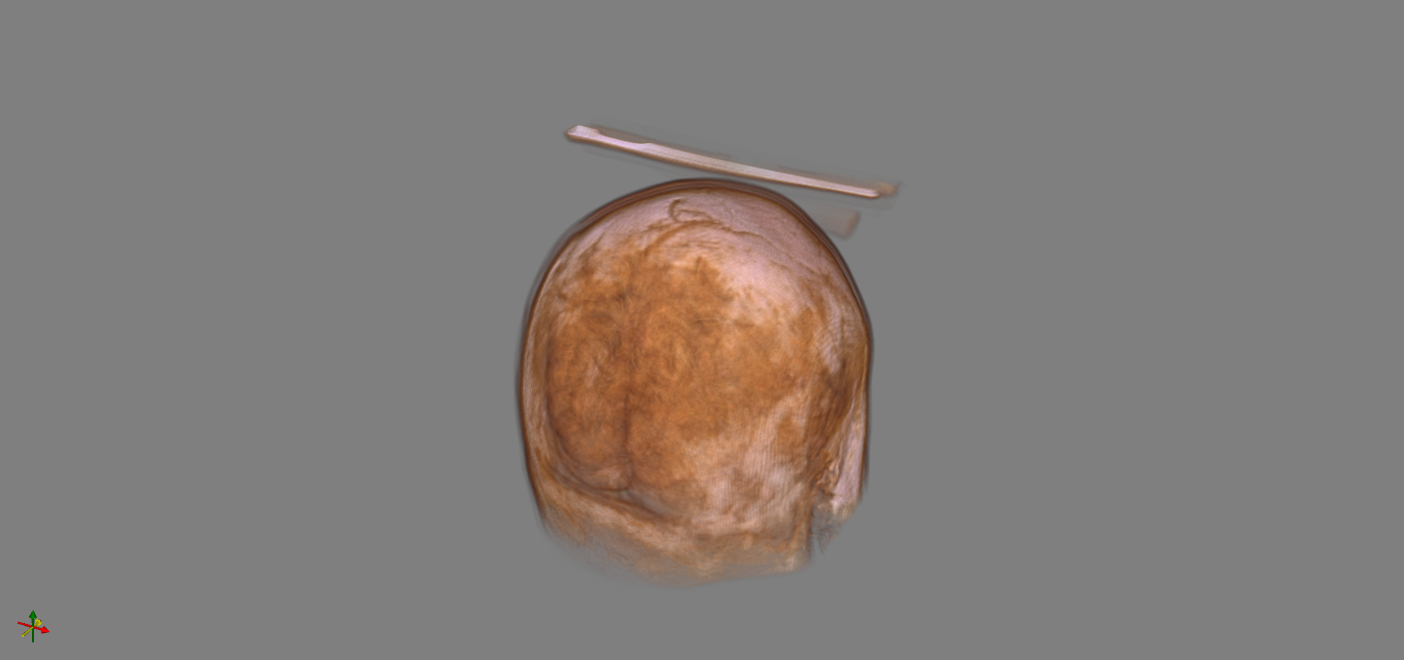

<IPython.core.display.Javascript object>

In [20]:
view(deformed)

In [21]:
checker_board = itk.checker_board_image_filter(input_image, deformed)
itk.imwrite(checker_board, checker_board_image)


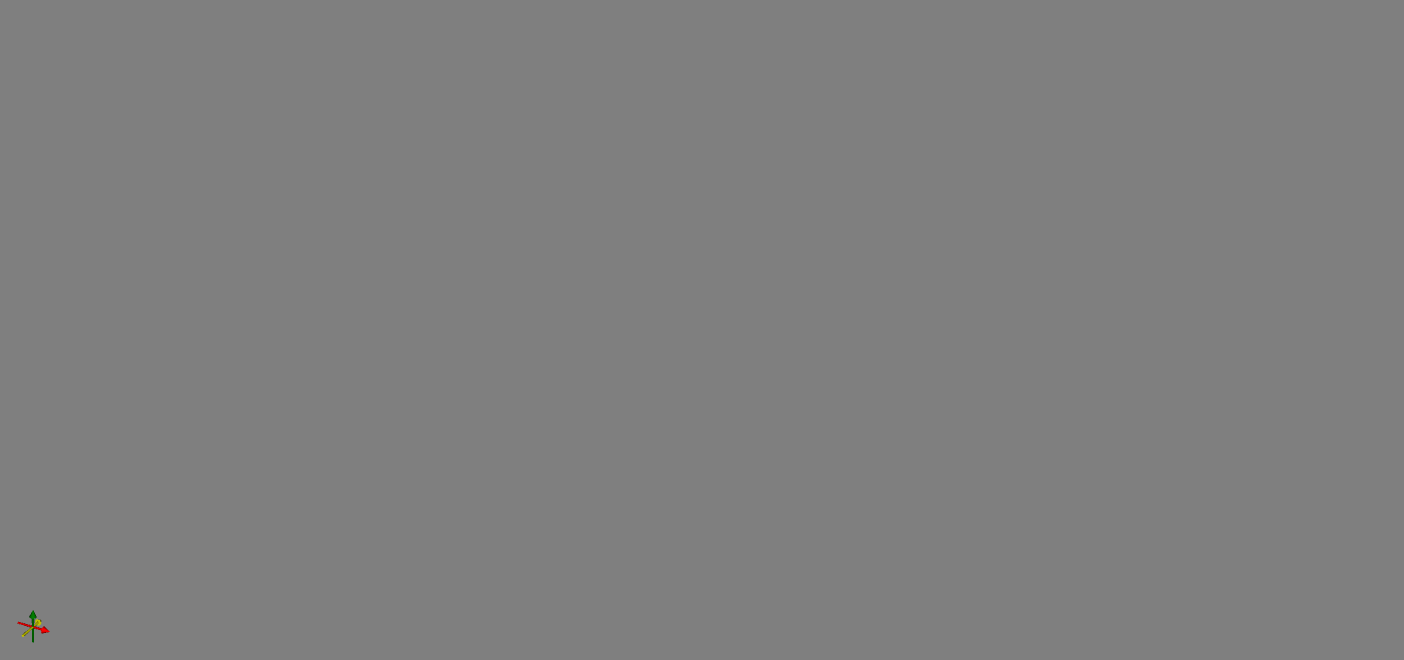
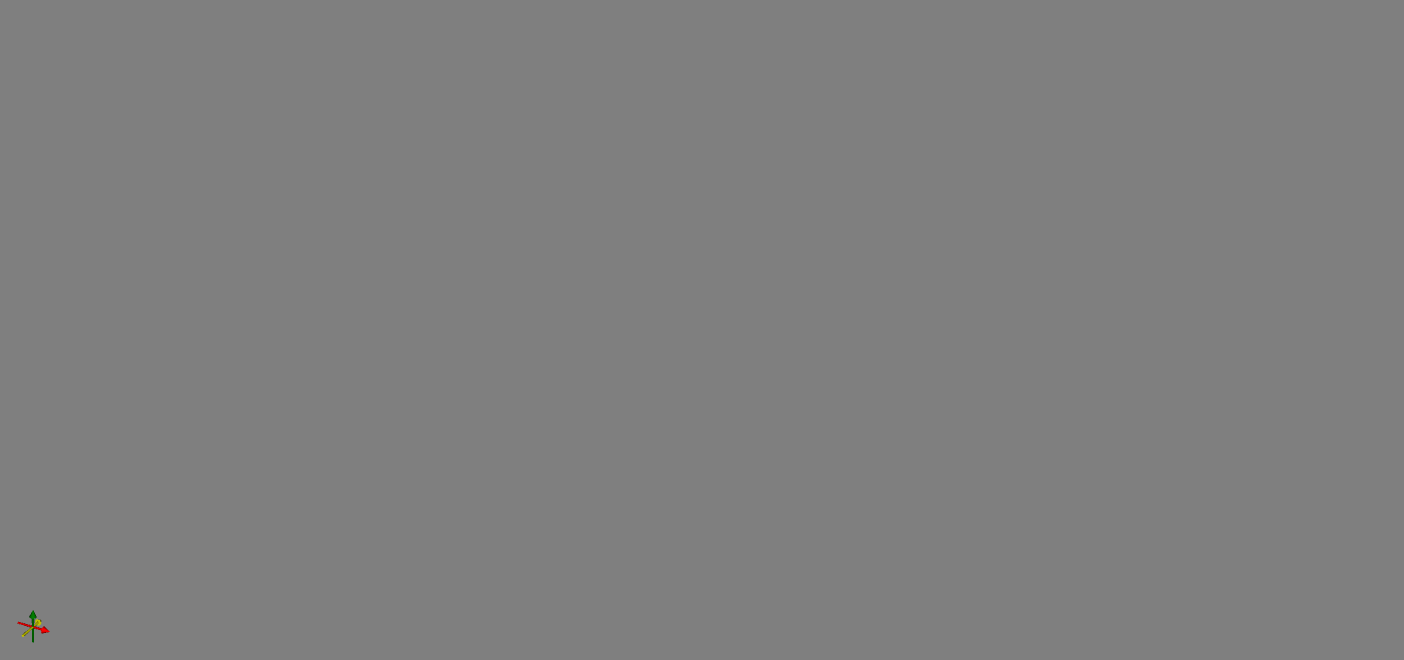

<IPython.core.display.Javascript object>

In [22]:
view(checker_board)